# Aula 2

Da última vez nos deparamos com um impecílio que a princípio não sabemos resolver: incluir as restrições na solução do problema de otimização.

Para superar esse obstáculo, precisamos de uma ferramenta conhecida como **multiplicadores de Lagrange**.

## Multiplicadores de Lagrange

Tomemos o problema de encontrar o ponto de mínimo de um parabolóide elíptico.
$$f(x,y) = x^2 + y^2$$
Entretanto acrescentaremos a restrição de apenas podermos escolher pontos pertencentes a $g(x,y) = 0$.
$$g(x,y) = y -\cos(x)$$
$$y - \cos(x) = 0$$

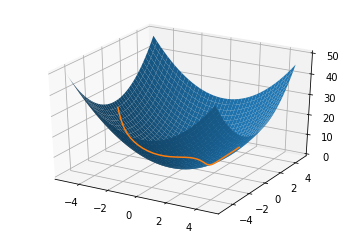

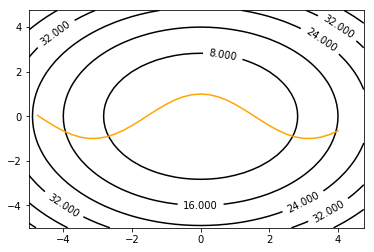

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#Paraboloid: f(x,y)
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

#Restricting curve: g(x,y)
line_x = -np.arange(-4,5,0.25)
line_y = np.cos(line_x)
line_z = line_x**2 + line_y**2

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the paraboloid.
ax.plot_surface(X, Y, Z)

#Plot the restiction function
ax.plot(line_x, line_y, line_z)

#3D plot
plt.show()

#2nd plot
#Plot the paraboloid
paraboloid = plt.contour(X, Y, Z, colors="k")
plt.clabel(paraboloid, inline=1, fontsize=10)
#Plot the restriction
plt.plot(line_x, line_y, color="orange")
#Contour plot
plt.show()

Olhando para as figuras da forma como estão, conseguimos dizer sem exatidão qual é o ponto de mínimo pertencente à curva laranja. Entretanto, não é tão trivial de enxergar uma característica que nos permita formalizar o que estamos buscando.

Talvez, se olharmos para o gradiente dessas funções, consigamos detectar um padrão interessante.

$$
    \nabla f = 
    \begin{bmatrix}
        2x \\
        2y
    \end{bmatrix}
$$

$$
    \nabla g = 
    \begin{bmatrix}
        \sin(x) \\
        1
    \end{bmatrix}
$$

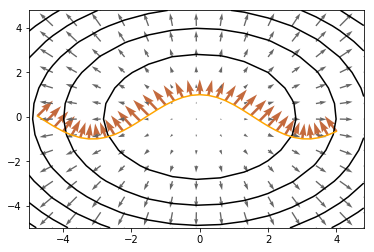

In [2]:
#Calculando os vetores do gradiente da restrição
constraint_Ox = line_x
constraint_Oy = line_y
constraint_Dx = np.sin(line_x)
constraint_Dy = np.ones(line_y.shape)

#Reduzindo o número de setas a serem desenhadas para que fiquem com um tamanho razoável
X = np.arange(-5, 5, 0.7)
Y = np.arange(-5, 5, 0.7)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

#Calculando os vetores do gradiente da função que queremos minimizar
f_Ox = X
f_Oy = Y
f_Dx = 2*X
f_Dy = 2*Y

#Plot everything
plt.figure()
ax = plt.gca()
CS = plt.contour(X, Y, Z, colors="k")
ax.quiver(constraint_Ox, constraint_Oy, constraint_Dx, constraint_Dy, color="#C46A3D")
ax.quiver(f_Ox, f_Oy, f_Dx, f_Dy, color="#666666") # ¯\_(ツ)_/¯
plt.plot(line_x, line_y, color="orange")
plt.draw()
plt.show()

Analisando a situação, podemos chegar à conclusão de que a curva de nível de $f$ com menor valor que respeite as restrições é tangente a $g$. Afinal, se não fosse, bastava seguir a curva mais adiante na direção de decrescimento e obteríamos um valor menor.

Mais interessante do que isso é notar a relação dos gradientes no ponto crítico. Apesar do tamanho das setas na imagem, é possível enxergar que os vetores tanto de $g$ quanto de $f$ são paralelos no ponto crítico. Isso nos dá uma primeira forma de formalizarmos o que queremos.

$$
    \nabla f \mathbin{\|} \nabla g
$$

Isso significa que ambos os vetores estão em uma mesma direção, apenas possuem uma magnitude - e possivelmente sentido - diferente. Com essa constatação, podemos escrever a seguinte equação:

$$ \nabla f = \lambda \nabla g$$

Afinal, se ambos os vetores possuem a mesma direção, basta mudarmos o escalonamento para chegarmos de um ao outro (o sinal de $\lambda$ cuida do sentido do vetor).

Com um pouco de manipulação, podemos chegar em uma nova função conhecida como *Lagrangiano*.

$$
    \nabla f - \lambda \nabla g = 0
$$

$$
    \nabla (\underbrace{f - \lambda g}_\text{Lagrangiano}) = 0
$$

Essa função nos permite encontrar pontos críticos de $f$ que respeitem a restrição $g$ quando a igualamos a zero.

Para informações mais detalhadas sobre multiplicadores de Lagrange, recomendo lerem [Lagrange multipliers, introduction](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/constrained-optimization/a/lagrange-multipliers-single-constraint).

Com esse conhecimento, podemos voltar ao problema da Aula 1 e solucioná-lo de vez.

Para relembrar, o problema é resolver a seguinte minimização:

$$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}\max_{\substack{v \\ \norm{v} = 1}}v^TA^TAv$$

Também havíamos calculado o gradiente dessa função:

$$
    f = v^TA^TAv \\
    \nabla f = 2A^T Av
$$

Precisamos escrever a função que representa a restrição.

$$
    \norm{v} = 1 \\
    \norm{v}^2 = 1 \\
    \norm{v}^2 - 1 = 0 \\
    v^Tv - 1 = 0 \\
    g = v^Tv - 1
$$

Finalmente, tiremos o gradiente de $g$.

$$
    \nabla g = 2v
$$

Agora podemos usar os multiplicadores de Lagrange para resolver o problema.

$$
    2 A^T A = \lambda 2 v \\ 
    A^T A = \lambda v
$$

Com essa ferramenta final, acabamos transformando um problema que era originalmente de otimização, em um de auto valores e auto vetores. Podemos, então, usar técnicas de encontrar auto valores e auto vetores - como, por exemplo, o método da potência - para resolver o problema. Usando essas técnicas encontraremos potencialmente mais de um auto vetor, como estamos interessados em maximizar o problema, basta escolhermos o vetor associado ao maior auto valor.

Isso pode ser visto seguindo as manipulações abaixo.

$$
    \max_{\substack{v \\ \norm{v} = 1}}\norm{Av}^2 = v_i^TA^TAv_i \\
    \max_{\substack{v \\ \norm{v} = 1}}\norm{Av}^2 = v_i^T\lambda_i v_i \\
    \max_{\substack{v \\ \norm{v} = 1}}\norm{Av}^2 = \lambda_i \\
$$

Onde $v_i$ é um auto vetor unitário e $\lambda_i$ o auto valor associado a ele.

Dessa forma o auto vetor com maior auto valor é o que maximiza a expressão toda.

Resolvemos o problema em uma dimensão, como será que a solução encontrada escala para outras dimensões? O que faríamos para projetar pontos em uma plano 2D? Ou até 3D?